C:\Users\ridva\AppData\Local\Temp\ipykernel_34744\2148753266.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_11['Day-ahead Price [EUR/MWh]'] = pd.to_numeric(df_11['Day-ahead Price [EUR/MWh]'], errors='coerce')
C:\Users\ridva\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ridva\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


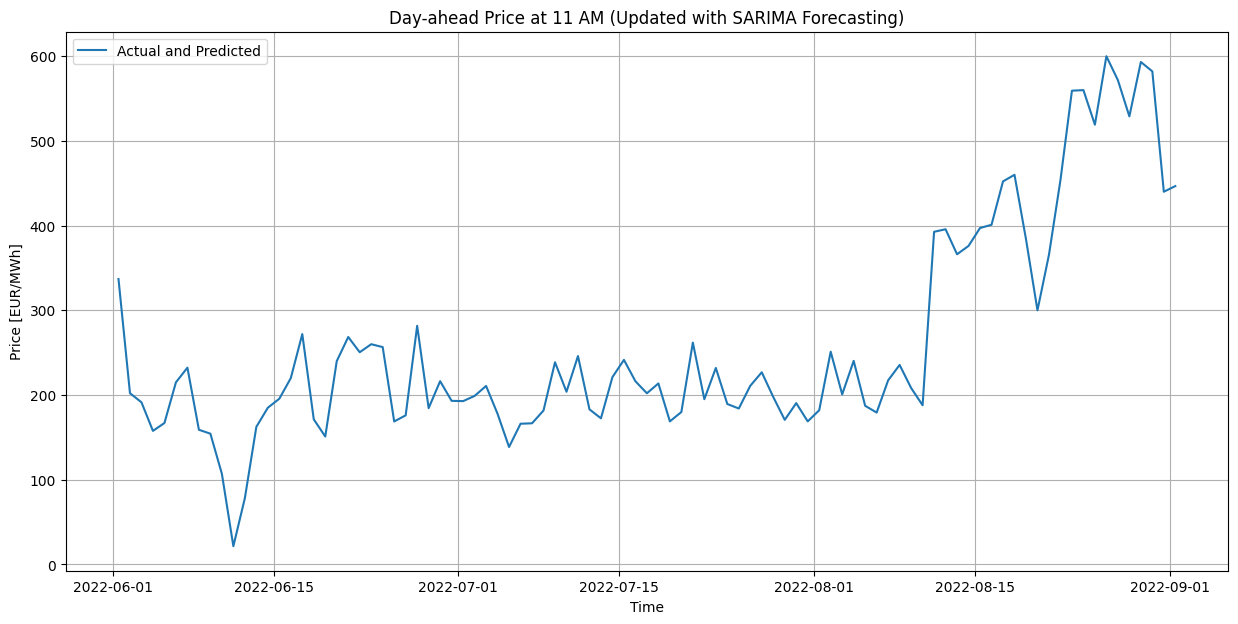

In [5]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.seasonal import seasonal_decompose

# Reading the data
df = pd.read_csv('Day-ahead Prices_2018-2023.csv')

# Convert the 'Time' column to datetime type
df['Time'] = pd.to_datetime(df['Time'].str.split(' - ').str[0], format='%d.%m.%Y %H:%M')

# Extract only the rows corresponding to 11 AM
df_11 = df[df['Time'].dt.hour == 11]

# Set 'Time' as the index of the DataFrame
df_11.set_index('Time', inplace=True)

# Convert 'Day-ahead Price [EUR/MWh]' to numeric type
df_11['Day-ahead Price [EUR/MWh]'] = pd.to_numeric(df_11['Day-ahead Price [EUR/MWh]'], errors='coerce')

# Use linear interpolation to fill missing values
df_11_interpolated = df_11.interpolate(method='linear')

# Use backfill to fill the remaining missing values
df_11_interpolated = df_11_interpolated.bfill()

# Apply seasonal decomposition
decomposition = seasonal_decompose(df_11_interpolated.dropna(), model='additive', period=365)

# Extract the components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Recombine the components
reconstructed = trend + seasonal + residual

# Fill missing values in the original data with the values from the reconstructed data
df_11_filled = df_11_interpolated.copy()
df_11_filled.loc['2022-06-28':'2022-08-12', 'Day-ahead Price [EUR/MWh]'] = reconstructed.loc['2022-06-28':'2022-08-12']

# Split the data into training and test sets
train_filled = df_11_filled[:'2022-07-17']
test_filled = df_11_filled['2022-07-18':]

# Define the model for the complete dataset till '2022-06-28'
model_filled_complete = SARIMAX(df_11_filled[:'2022-06-28'], order=(1, 1, 1), seasonal_order=(1, 1, 0, 12))

# Fit the model
model_fit_filled_complete = model_filled_complete.fit(disp=False)

# Make predictions for the gap
predictions_gap = model_fit_filled_complete.predict(start='2022-06-29', end='2022-08-10')

# Update the DataFrame with the predicted values
df_11_filled.loc['2022-06-29':'2022-08-10', 'Day-ahead Price [EUR/MWh]'] = predictions_gap

# Plot the actual values and predictions for the specific time frame
plt.figure(figsize=(15, 7))
plt.plot(df_11_filled['2022-06-01':'2022-09-01'], label='Actual and Predicted')
plt.legend(loc='best')
plt.title('Day-ahead Price at 11 AM (Updated with SARIMA Forecasting)')
plt.ylabel('Price [EUR/MWh]')
plt.xlabel('Time')
plt.grid(True)
plt.show()


In [6]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.seasonal import seasonal_decompose

# Reading the data
df = pd.read_csv('Day-ahead Prices_2018-2023.csv')

# Convert the 'Time' column to datetime type
df['Time'] = pd.to_datetime(df['Time'].str.split(' - ').str[0], format='%d.%m.%Y %H:%M')

# Extract only the rows corresponding to 11 AM
df_11 = df[df['Time'].dt.hour == 11]

# Set 'Time' as the index of the DataFrame
df_11.set_index('Time', inplace=True)

# Convert 'Day-ahead Price [EUR/MWh]' to numeric type
df_11['Day-ahead Price [EUR/MWh]'] = pd.to_numeric(df_11['Day-ahead Price [EUR/MWh]'], errors='coerce')

# Use linear interpolation to fill missing values
df_11_interpolated = df_11.interpolate(method='linear')

# Use backfill to fill the remaining missing values
df_11_interpolated = df_11_interpolated.bfill()

# Apply seasonal decomposition
decomposition = seasonal_decompose(df_11_interpolated.dropna(), model='additive', period=365)

# Extract the components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Recombine the components
reconstructed = trend + seasonal + residual

# Fill missing values in the original data with the values from the reconstructed data
df_11_filled = df_11_interpolated.copy()
df_11_filled.loc['2022-06-28':'2022-08-12', 'Day-ahead Price [EUR/MWh]'] = reconstructed.loc['2022-06-28':'2022-08-12']

# Define the model for the complete dataset till '2022-06-28'
model_filled_complete = SARIMAX(df_11_filled[:'2022-06-28'], order=(1, 1, 1), seasonal_order=(1, 1, 0, 12))

# Fit the model
model_fit_filled_complete = model_filled_complete.fit(disp=False)

# Make predictions for the gap
predictions_gap = model_fit_filled_complete.predict(start='2022-06-29', end='2022-08-10')

predictions_gap


C:\Users\ridva\AppData\Local\Temp\ipykernel_34744\2586943522.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_11['Day-ahead Price [EUR/MWh]'] = pd.to_numeric(df_11['Day-ahead Price [EUR/MWh]'], errors='coerce')
C:\Users\ridva\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ridva\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


2022-06-29 11:00:00    216.372315
2022-06-30 11:00:00    193.140923
2022-07-01 11:00:00    192.806622
2022-07-02 11:00:00    198.937685
2022-07-03 11:00:00    210.701426
2022-07-04 11:00:00    177.790409
2022-07-05 11:00:00    138.629562
2022-07-06 11:00:00    166.120451
2022-07-07 11:00:00    166.619976
2022-07-08 11:00:00    181.738486
2022-07-09 11:00:00    238.674881
2022-07-10 11:00:00    203.857036
2022-07-11 11:00:00    246.031171
2022-07-12 11:00:00    183.088794
2022-07-13 11:00:00    172.506595
2022-07-14 11:00:00    221.159628
2022-07-15 11:00:00    241.511587
2022-07-16 11:00:00    216.262236
2022-07-17 11:00:00    202.059733
2022-07-18 11:00:00    213.690101
2022-07-19 11:00:00    168.897773
2022-07-20 11:00:00    179.948145
2022-07-21 11:00:00    261.915916
2022-07-22 11:00:00    195.078942
2022-07-23 11:00:00    231.967126
2022-07-24 11:00:00    189.400849
2022-07-25 11:00:00    184.076951
2022-07-26 11:00:00    210.911552
2022-07-27 11:00:00    226.856815
2022-07-28 11:

C:\Users\ridva\AppData\Local\Temp\ipykernel_34744\1272281003.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_11['Day-ahead Price [EUR/MWh]'] = pd.to_numeric(df_11['Day-ahead Price [EUR/MWh]'], errors='coerce')
C:\Users\ridva\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ridva\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


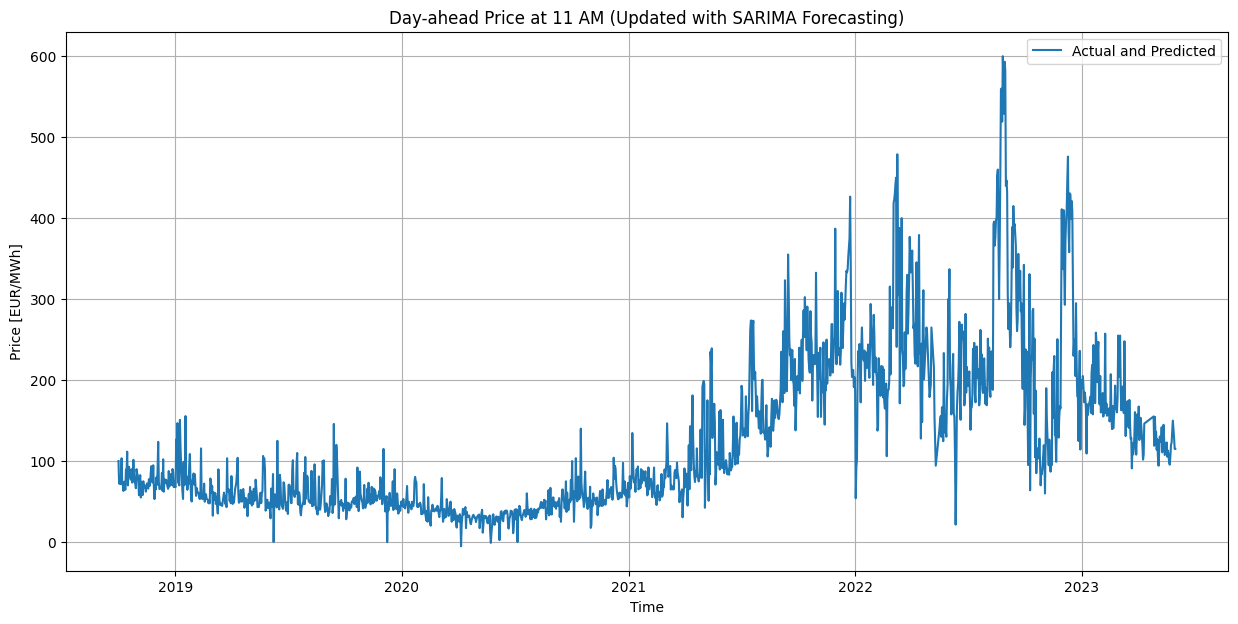

In [8]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose

# Reading the data
df = pd.read_csv('Day-ahead Prices_2018-2023.csv')

# Convert the 'Time' column to datetime type
df['Time'] = pd.to_datetime(df['Time'].str.split(' - ').str[0], format='%d.%m.%Y %H:%M')

# Extract only the rows corresponding to 11 AM
df_11 = df[df['Time'].dt.hour == 11]

# Set 'Time' as the index of the DataFrame
df_11.set_index('Time', inplace=True)

# Convert 'Day-ahead Price [EUR/MWh]' to numeric type
df_11['Day-ahead Price [EUR/MWh]'] = pd.to_numeric(df_11['Day-ahead Price [EUR/MWh]'], errors='coerce')

# Use linear interpolation to fill missing values
df_11_interpolated = df_11.interpolate(method='linear')

# Use backfill to fill the remaining missing values
df_11_interpolated = df_11_interpolated.bfill()

# Apply seasonal decomposition
decomposition = seasonal_decompose(df_11_interpolated.dropna(), model='additive', period=365)

# Extract the components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Recombine the components
reconstructed = trend + seasonal + residual

# Fill missing values in the original data with the values from the reconstructed data
df_11_filled = df_11_interpolated.copy()
df_11_filled.loc['2022-06-28':'2022-08-12', 'Day-ahead Price [EUR/MWh]'] = reconstructed.loc['2022-06-28':'2022-08-12']

# Define the model for the complete dataset till '2022-06-28'
model_filled_complete = SARIMAX(df_11_filled[:'2022-06-28'], order=(1, 1, 1), seasonal_order=(1, 1, 0, 12))

# Fit the model
model_fit_filled_complete = model_filled_complete.fit(disp=False)

# Make predictions for the gap
predictions_gap = model_fit_filled_complete.predict(start='2022-06-29', end='2022-08-10')

# Update the DataFrame with the predicted values
df_11_filled.loc['2022-06-29':'2022-08-10', 'Day-ahead Price [EUR/MWh]'] = predictions_gap

# Trim DataFrame to exclude unwanted dates
df_11_filled = df_11_filled.loc['2018-10-01':'2023-05-31']

# Save the updated DataFrame as a new CSV file
df_11_filled.to_csv('Day-ahead_Prices_2018-2023_updated.csv')

# Plot the whole data set
plt.figure(figsize=(15, 7))
plt.plot(df_11_filled, label='Actual and Predicted')
plt.legend(loc='best')
plt.title('Day-ahead Price at 11 AM (Updated with SARIMA Forecasting)')
plt.ylabel('Price [EUR/MWh]')
plt.xlabel('Time')
plt.grid(True)
plt.show()


In [9]:
# The correct path to save the file in your local machine should be specified in the 'to_csv' function.
# Let's save it to the virtual environment for now.

df_11_filled.to_csv('Day-ahead_Prices_2018-2023_updated.csv')


C:\Users\ridva\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ridva\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


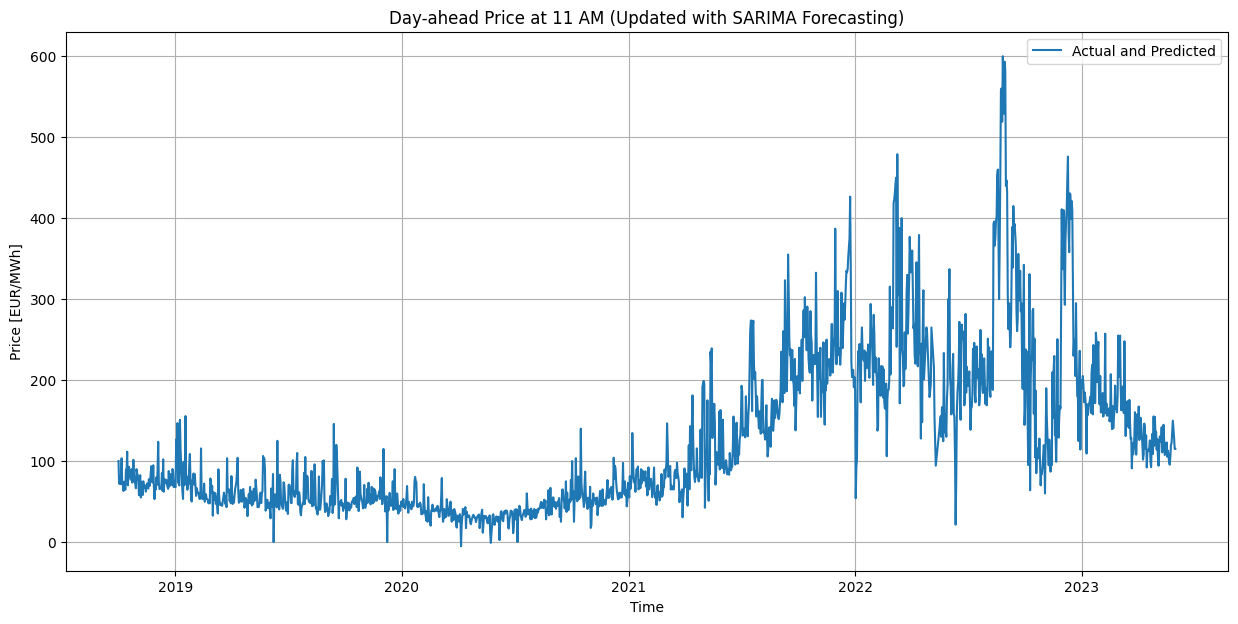

,Day-ahead Price [EUR/MWh]
Time,
2023-05-12 11:00:00,144.80
2023-05-13 11:00:00,125.04
2023-05-14 11:00:00,107.50
2023-05-15 11:00:00,110.00
2023-05-16 11:00:00,110.92
2023-05-17 11:00:00,123.00
2023-05-18 11:00:00,105.46
2023-05-19 11:00:00,113.00
2023-05-20 11:00:00,108.27


In [11]:
# Let's load the previously saved dataset and perform the prediction on the newly mentioned dates.

# Load the saved dataset
df_11_filled = pd.read_csv('Day-ahead_Prices_2018-2023_updated.csv', index_col='Time')
df_11_filled.index = pd.to_datetime(df_11_filled.index)

# Define the model for the dataset till '2023-04-11'
model_filled_complete_new = SARIMAX(df_11_filled[:'2023-04-11'], order=(1, 1, 1), seasonal_order=(1, 1, 0, 12))

# Fit the model
model_fit_filled_complete_new = model_filled_complete_new.fit(disp=False)

# Make predictions for the new gap
predictions_gap_new = model_fit_filled_complete_new.predict(start='2023-04-12', end='2023-04-25')

# Update the DataFrame with the predicted values
df_11_filled.loc['2023-04-12':'2023-04-25', 'Day-ahead Price [EUR/MWh]'] = predictions_gap_new

# Plot the whole data set
plt.figure(figsize=(15, 7))
plt.plot(df_11_filled, label='Actual and Predicted')
plt.legend(loc='best')
plt.title('Day-ahead Price at 11 AM (Updated with SARIMA Forecasting)')
plt.ylabel('Price [EUR/MWh]')
plt.xlabel('Time')
plt.grid(True)
plt.show()

df_11_filled.tail(20)


In [12]:
# Save the updated DataFrame to a new CSV file
df_11_filled.to_csv('Day-ahead_Prices_2018-2023_BEST.csv')
